In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [3]:
def gaussian(x, u, sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

Iteration  0
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
0 0
Iteration  1
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
0 1
Iteration  2
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
0 2
Iteration  3
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
0 3
Iteration  4
X_train shape:  (397, 10)
X_test shape:  (45, 10)
y_train shape:  (397,)
y_test shape:  (45,)
0 4
Iteration  5
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
1 0
Iteration  6
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
1 1
Iteration  7
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
1 2
Iteration  8
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
1 3
I

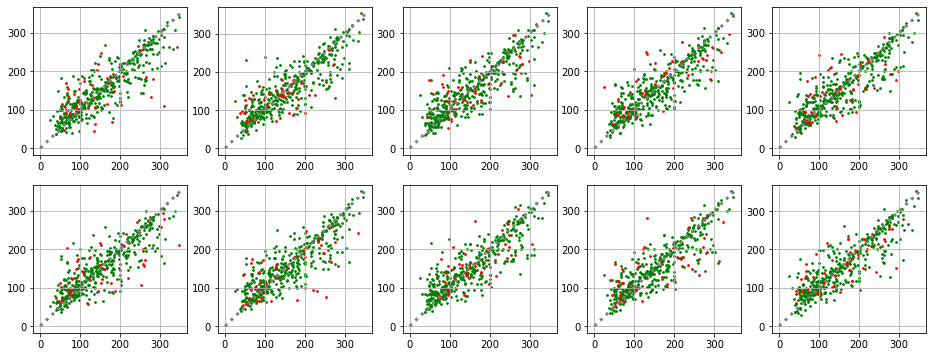

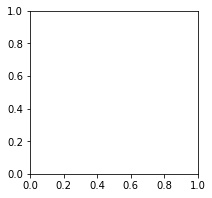

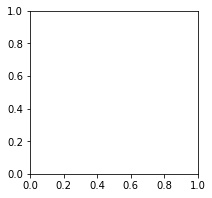

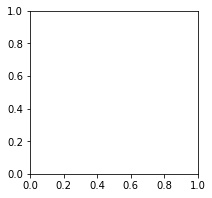

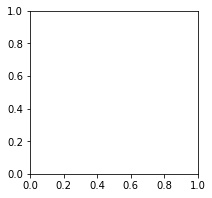

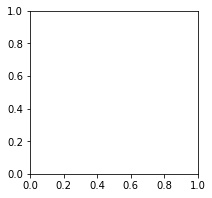

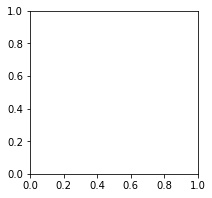

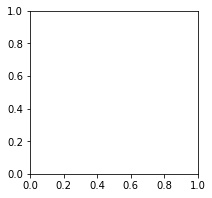

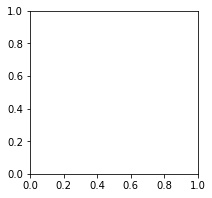

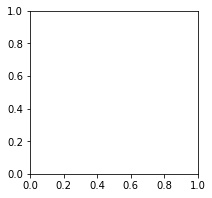

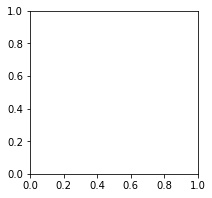

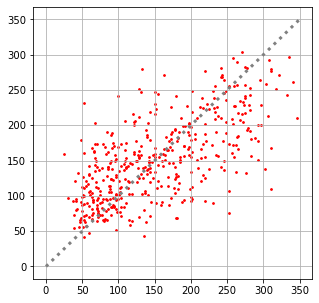

In [4]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

dosort = True

N,p = X.shape
M = 200

means, stds = [],[]
for j in range(p):
    col = X[:,j]
    means.append(np.mean(col))
    stds.append(np.std(col))
    for i in range(N):
        X[i,j] = (X[i,j]-means[j])/stds[j]
        
if False:  
    indices = np.argsort(y)
    xsorted = np.zeros((N,p))
    for i,j in zip(indices,range(N)):
        xsorted[i] = X[j]
    X = xsorted
    y = np.sort(y)
        
xwidth = X.shape[0]/10
ywidth = y.shape[0]/10

fig, axs = plt.subplots(2, 5,figsize=(16,6))

final3 = []
final4 = []

for iter in range(10):
    print("Iteration ", iter)
    X_test = X[int(iter*xwidth):int((iter+1)*xwidth),:]
    #X_train = X - X_test
    y_test = y[int(iter*ywidth):int((iter+1)*ywidth)]
    if iter == 0:
        X_train = X[int((iter+1)*xwidth):,:]
        y_train = y[int((iter+1)*ywidth):]
    elif iter == 9:
        X_train = X[:int(iter*xwidth),:]
        y_train =  y[:int(iter*ywidth)]
    else:
        X_train = np.concatenate((X[int((iter+1)*xwidth):,:], X[:int(iter*xwidth),:]))
        y_train = np.concatenate((y[int((iter+1)*ywidth):], y[:int(iter*ywidth)]))
    N, p = X_train.shape
    print("X_train shape: ", X_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_train shape: ", y_train.shape)
    print("y_test shape: ", y_test.shape)


    # Space for design matrix
    U = np.zeros((N,M))
    U_test = np.zeros((N,M))

    # Basis function locations at random
    #C = np.random.randn(M,p)
    kmeans = KMeans(init='k-means++', n_clusters=M)
    kmeans.fit(X_train)
    C = kmeans.cluster_centers_

    # Basis function range as distance between two random data
    sigmas = []
    for i in range(10):
        x1 = X_train[np.floor(np.random.rand()*N).astype(int),:]
        x2 = X_train[np.floor(np.random.rand()*N).astype(int),:]
        sigmas.append(np.linalg.norm(x1-x2))
    sigma = np.mean(sigmas)

    # Construct the design matrix
    for i in range(N):
        for j in range(M):
            U[i,j] = gaussian(X_train[i,:], C[j,:], sigma)
            # X[i,:] is i-th row of X
            # C[j,:] is j-th row of C
    for i in range(X_test.shape[0]):
        for j in range(M):
            U_test[i,j] = gaussian(X_test[i,:], C[j,:], sigma)
    
    # Pseudo inverse solution for linear part
    l = np.linalg.inv(U.T @ U) @ U.T
    l = l @ y_train

    # Predicted values on training data
    yh_train = U @ l
    yh_test = U_test @ l
    yh_test = yh_test[:len(y_test)]

    fig, ax = plt.subplots(figsize=(3,3))
    lin = np.linspace(0,350)
    a=int(np.floor(iter/5))
    b=iter % 5
    print(a,b)
    axs[a,b].plot(lin,lin,c="grey",linestyle=":",linewidth=3)
    axs[a,b].scatter(y_train, yh_train, c="g", s=3)
    axs[a,b].scatter(y_test, yh_test, c="r", s=3)

    axs[a,b].grid(True)
    
    if iter == 0:
        final1 = y_test
        final2 = yh_test
    else:
        final1 = np.concatenate((final1,y_test))
        final2 = np.concatenate((final2,yh_test))
        #np.resize(final2,(final1.shape[0],1))
        #print(final1.shape,final2.shape)
    final3.append(y_test)
    final4.append(yh_test)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(True)
print(final1.shape)
print(final2.shape)
plt.plot(lin,lin,c="grey",linestyle=":",linewidth=3)
plt.scatter(final1, final2, c="r", s=3)

>1, train: 0.766, test: 0.760
>2, train: 0.813, test: 0.797
>3, train: 0.883, test: 0.876
>4, train: 0.904, test: 0.889
>5, train: 0.911, test: 0.897
>6, train: 0.932, test: 0.911
>7, train: 0.943, test: 0.921
>8, train: 0.950, test: 0.922
>9, train: 0.958, test: 0.922
>10, train: 0.965, test: 0.923
>11, train: 0.972, test: 0.921
>12, train: 0.976, test: 0.923
>13, train: 0.981, test: 0.915
>14, train: 0.986, test: 0.914
>15, train: 0.989, test: 0.918
>16, train: 0.992, test: 0.920
>17, train: 0.994, test: 0.917
>18, train: 0.995, test: 0.911
>19, train: 0.996, test: 0.910
>20, train: 0.998, test: 0.914


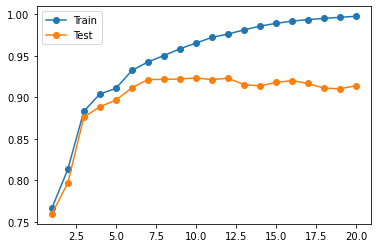

In [5]:

# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()